In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
my_data=pd.read_csv('Aurism_Processing1.csv')
my_data.head(5)
# my_data.info()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class.ASD
0,0,0,1,0,0,0,0,0,0,0,>27,m,White-European,no,no,Oceania,no,1,Self,NO
1,0,1,1,0,1,0,0,1,1,1,>27,m,Middle Eastern,no,no,Asia,no,6,Self,NO
2,1,0,1,1,1,1,0,0,1,0,>27,f,White-European,no,no,Oceania,no,6,Self,NO
3,1,0,0,1,1,1,1,0,1,1,>27,f,White-European,no,no,Oceania,no,7,Self,YES
4,1,0,1,1,0,1,1,1,1,1,>27,f,White-European,no,yes,North America,no,8,Self,YES


In [2]:
# 对分类变量进行编码
mapping_dict = {
    'ethnicity' : {
        "Asian" : 0,
        "Black" : 1,
        "Middle Eastern" : 2,
        "South Asian" : 3,
        "White-European" : 4,
        "Others" : 5
    },
    'jundice' : {
        "no" : 0,
        "yes" : 1
    },
    'austim' : {
        'no' : 0,
        'yes' : 1
    },
    'contry_of_res' : {
        "Africa" : 0,
        "Asia" : 1,
        "Europea" : 2,
        "North America" : 3,
        "Oceania" : 4,
        "South America" : 5
    },
    'gender' : {
        'm' : 0,
        'f' : 1
    },
    "used_app_before" : {
        "no" : 0,
        "yes" : 1
    },
    "age" : {
        "<27" : 0,
        ">27" : 1
    },
    "relation" :{ 
        "Self" : 0,
        "Other" : 1
    },
    "Class.ASD" : {
        "NO" : 0,
        "YES" : 1
    }
}
my_data = my_data.replace(mapping_dict) #变量映射
my_data.info()
my_data.to_csv('data')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   A1_Score         669 non-null    int64
 1   A2_Score         669 non-null    int64
 2   A3_Score         669 non-null    int64
 3   A4_Score         669 non-null    int64
 4   A5_Score         669 non-null    int64
 5   A6_Score         669 non-null    int64
 6   A7_Score         669 non-null    int64
 7   A8_Score         669 non-null    int64
 8   A9_Score         669 non-null    int64
 9   A10_Score        669 non-null    int64
 10  age              669 non-null    int64
 11  gender           669 non-null    int64
 12  ethnicity        669 non-null    int64
 13  jundice          669 non-null    int64
 14  austim           669 non-null    int64
 15  contry_of_res    669 non-null    int64
 16  used_app_before  669 non-null    int64
 17  result           669 non-null    int64
 18  relation  

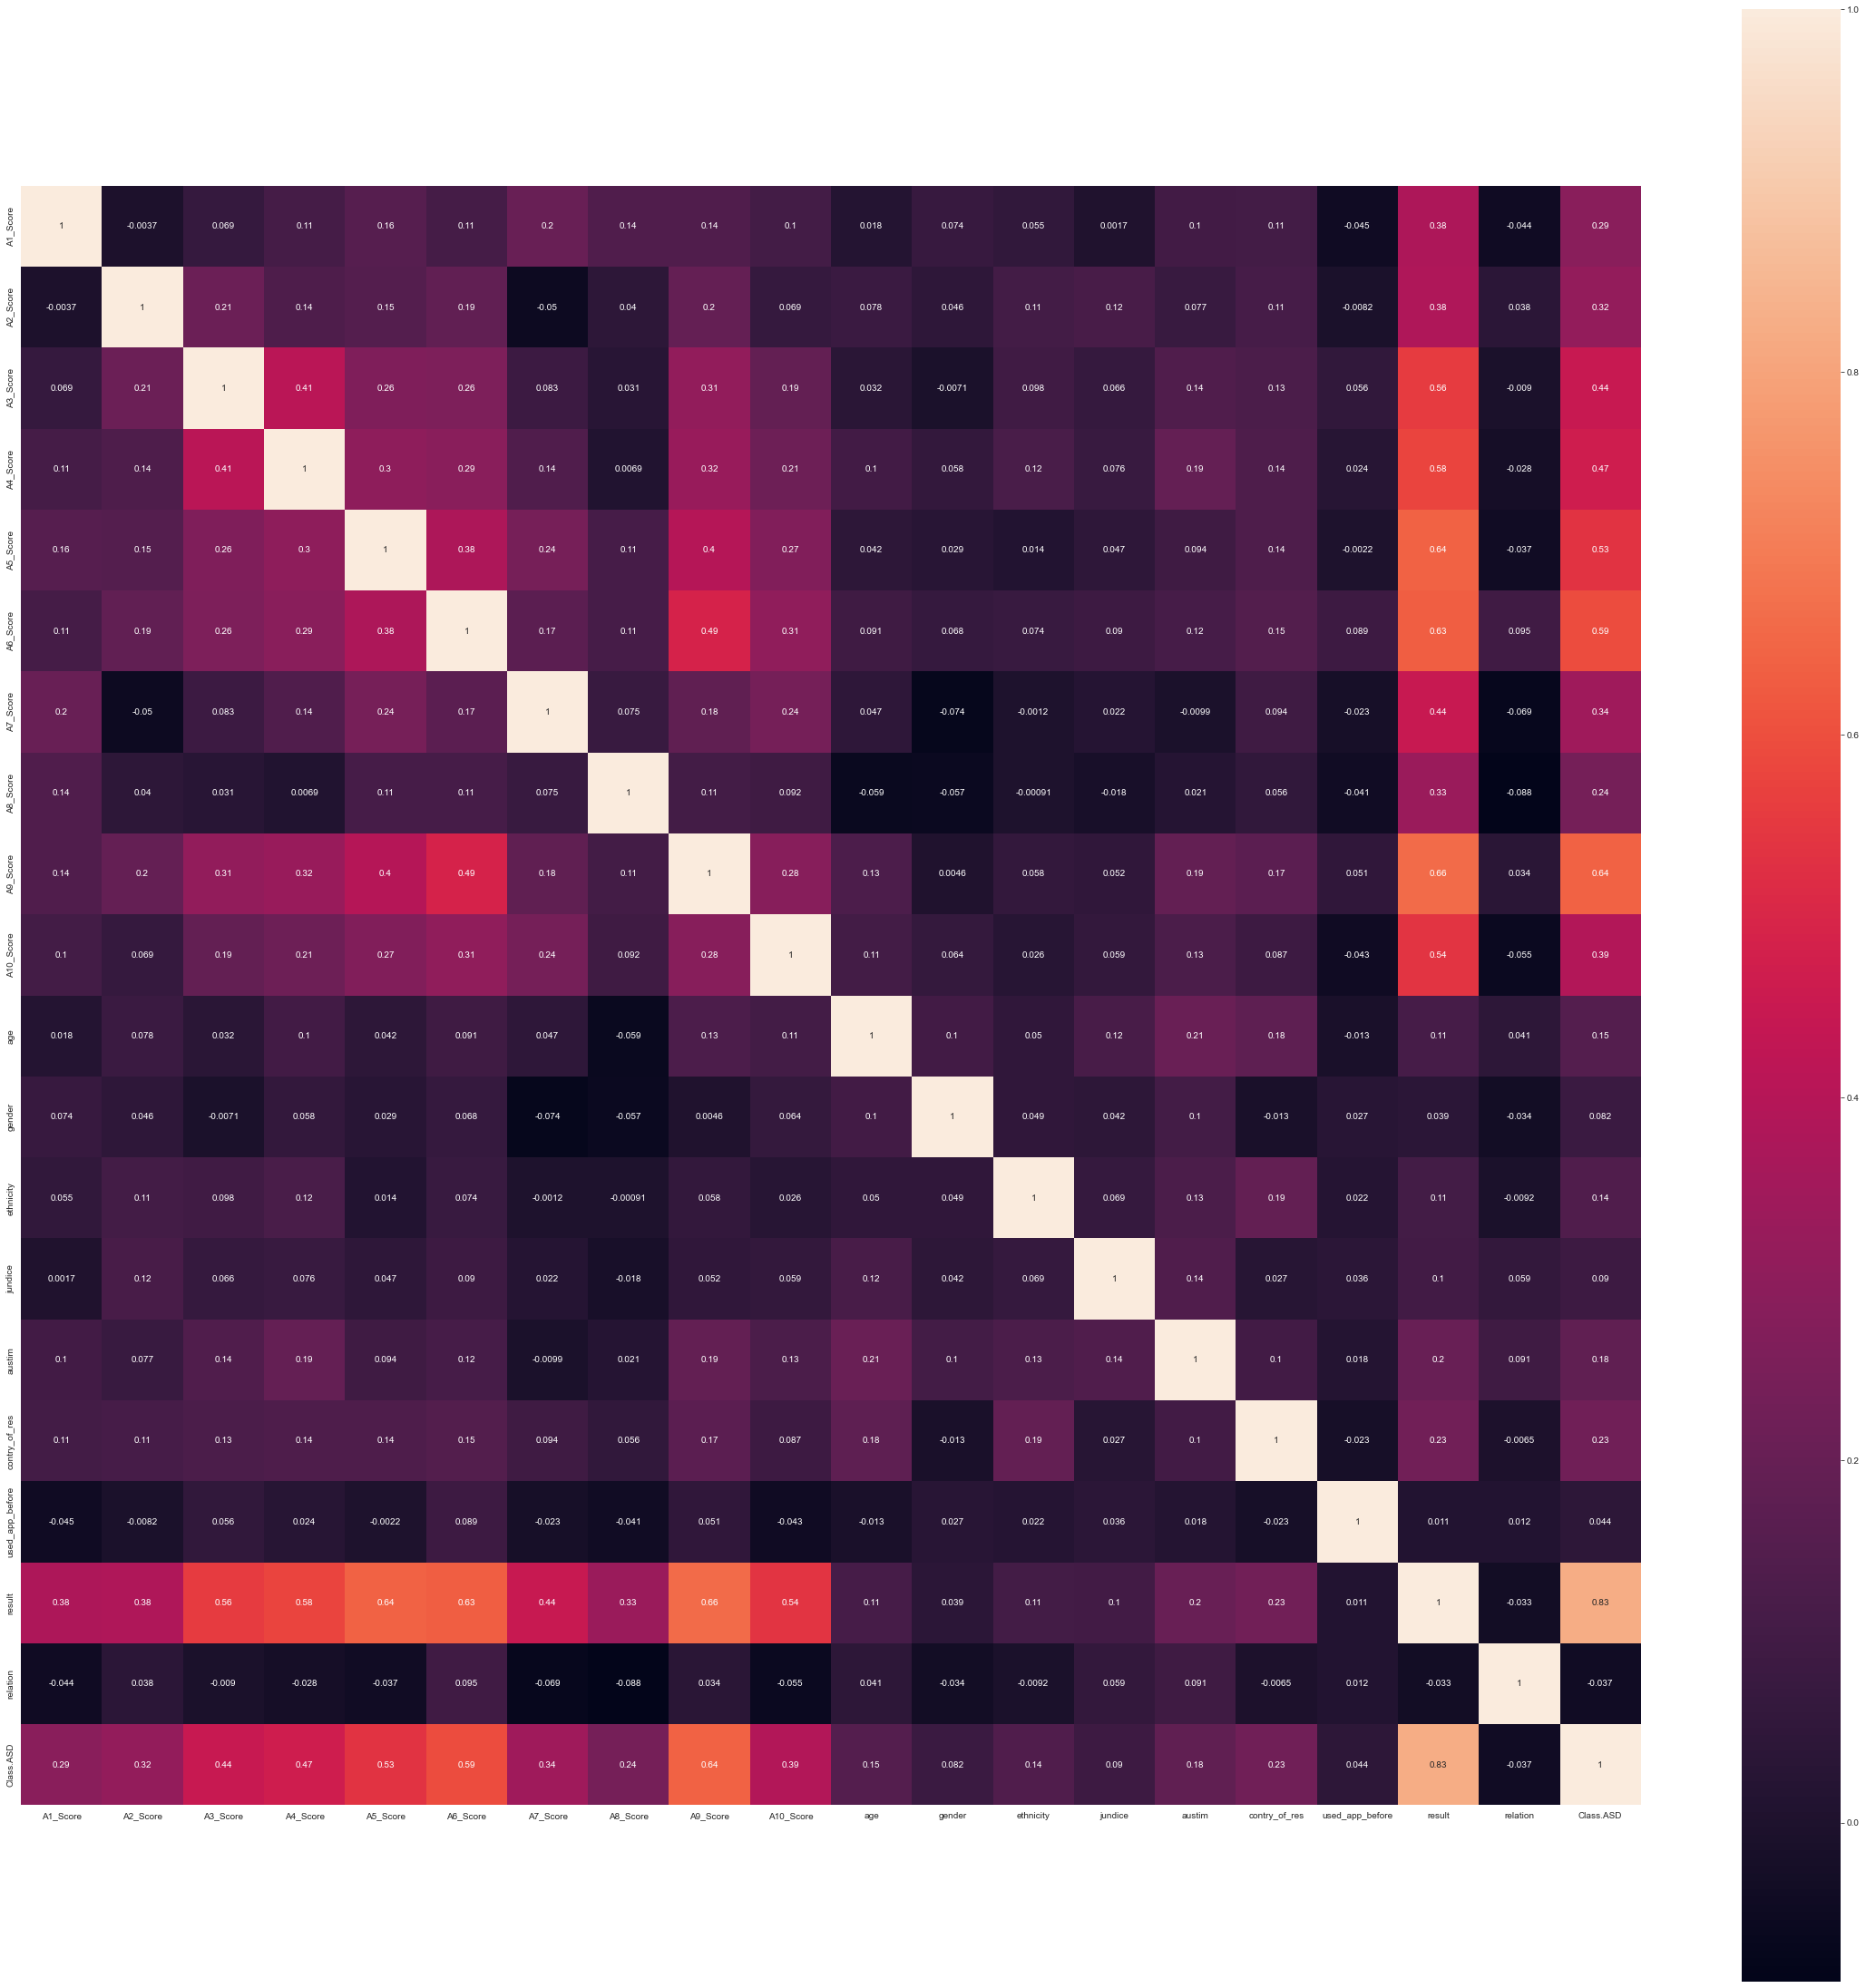

In [3]:
#绘制相关系数矩阵
plt.subplots(figsize=(40, 40))
sns.heatmap(my_data.corr(), annot=True, vmax=1, square=True)
plt.show()

In [4]:
# 查看因变量的分布
X = my_data.drop('Class.ASD',axis=1, inplace=False)
y = my_data.loc[:,'Class.ASD']
my_data['Class.ASD'].value_counts()

0    487
1    182
Name: Class.ASD, dtype: int64

In [5]:
# 数据标准化处理
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(X)
X = pd.DataFrame(data=sc_X, columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score',
       'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim','contry_of_res', 'used_app_before', 'result','relation'])
X.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation
0,-1.648231,-0.898948,1.079374,-0.992554,-1.016580,-0.634441,-0.843207,-1.345706,-0.690522,-1.160762,1.072905,-0.966191,0.531682,-0.313882,-0.373756,1.612106,-0.135147,-1.565043,-0.396786
1,-1.648231,1.112411,1.079374,-0.992554,0.983691,-0.634441,-0.843207,0.743104,1.448179,0.861503,1.072905,-0.966191,-0.566143,-0.313882,-0.373756,-0.957788,-0.135147,0.447671,-0.396786
2,0.606711,-0.898948,1.079374,1.007502,0.983691,1.576190,-0.843207,-1.345706,1.448179,-1.160762,1.072905,1.034992,0.531682,-0.313882,-0.373756,1.612106,-0.135147,0.447671,-0.396786
3,0.606711,-0.898948,-0.926463,1.007502,0.983691,1.576190,1.185949,-1.345706,1.448179,0.861503,1.072905,1.034992,0.531682,-0.313882,-0.373756,1.612106,-0.135147,0.850214,-0.396786
4,0.606711,-0.898948,1.079374,1.007502,-1.016580,1.576190,1.185949,0.743104,1.448179,0.861503,1.072905,1.034992,0.531682,-0.313882,2.675544,0.755475,-0.135147,1.252757,-0.396786


In [6]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

{'min_samples_split': 230, 'n_estimators': 100}
精度为： 0.9601990049751243
AUC值为： 0.9285714285714286
F1值为： 0.9731543624161073


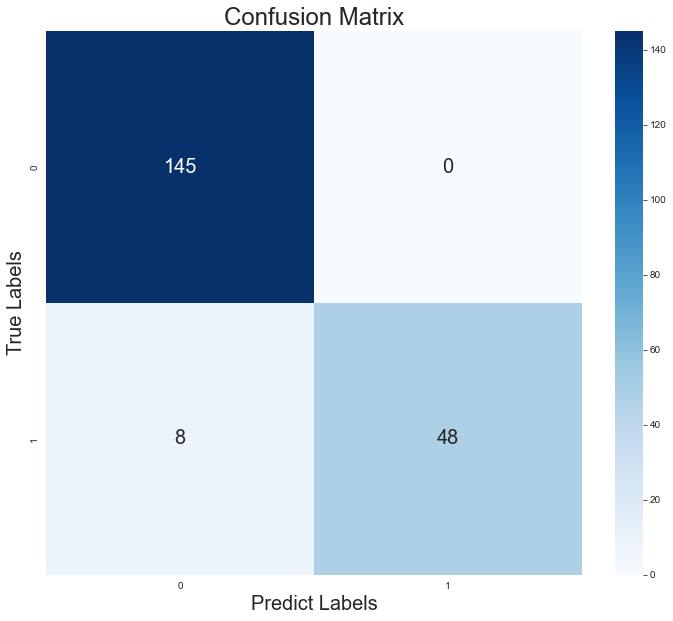

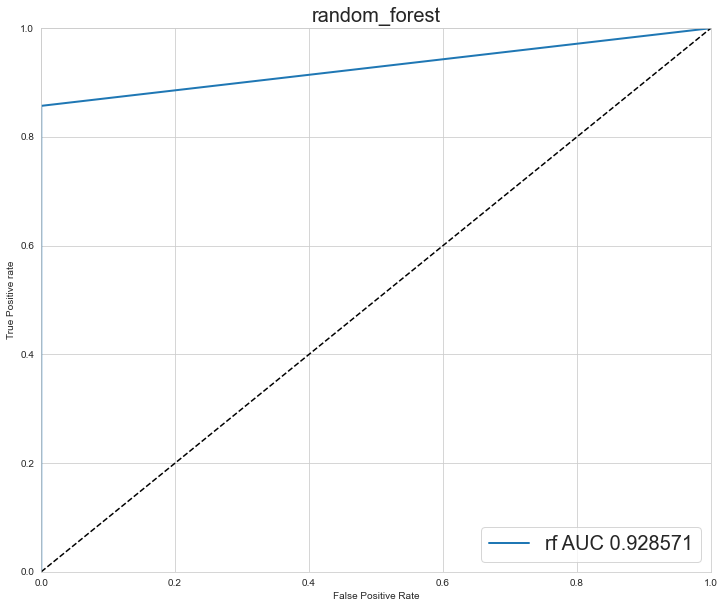

In [7]:
# 定义用于绘制ROC曲线的函数
def plot_roc_curve(fpr, tpr, label=None, titles=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")
    plt.legend(loc="lower right",fontsize=20)
    plt.title(titles, fontsize=20)


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix, precision_recall_fscore_support, f1_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
# 随机森林
parameters_rf = {'n_estimators':[100],
              #'max_features':range(1,10),
              'min_samples_split':range(230,250)}##240
rf = RandomForestClassifier(random_state=1234)
GS_rf = GridSearchCV(rf, parameters_rf, cv=3) # cv交叉验证

# 不进行过采样/欠采样
GS_rf.fit(X_train,y_train)    
print(GS_rf.best_params_)    # 查看最好的参数选择
best_rf = GS_rf.best_estimator_
best_rf.fit(X_train,y_train)
rf_pred = best_rf.predict(X_test)
print("精度为：", accuracy_score(y_test, rf_pred))
print("AUC值为：", roc_auc_score(y_test, rf_pred))
print("F1值为：", f1_score(y_test, rf_pred, average=None)[0])
f, axs = plt.subplots(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues", annot_kws={"size":20})
axs.set_title("Confusion Matrix", fontsize=24)
axs.set_xlabel("Predict Labels", fontsize=20)
axs.set_ylabel("True Labels", fontsize=20)
plt.show()
fpr, tpr, thresh = roc_curve(y_test, rf_pred)
plot_roc_curve(fpr,tpr,label='rf AUC %0.6f' % roc_auc_score(y_test, rf_pred), titles='random_forest') 
plt.savefig('随机森林.png')